<h1 style="text-align:center;">Insurance Premium Prediction</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv("insurance.csv")

In [3]:
df2=pd.read_csv('https://raw.githubusercontent.com/Ranjit-Singh-786/insorance-Premium-Prediction/master/insurance.csv')

In [4]:
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [7]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [8]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [10]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [11]:
df['charges'].mean()

13270.422265141257

In [12]:
#find out average charges of male and female

In [13]:
male=df[df["sex"]=='male']
female=df[df["sex"]=='female']

In [14]:
print("Average charges of male:",male['charges'].mean())

Average charges of male: 13956.751177721893


In [15]:
print("Average charges of female:",female['charges'].mean())

Average charges of female: 12569.578843835347


In [16]:
df2=female[female['charges']<=female['charges'].mean()]
df2.head()

,age,sex,bmi,children,smoker,region,charges
5,31,female,25.74,0,no,southeast,3756.6216
6,46,female,33.44,1,no,southeast,8240.5896
7,37,female,27.74,3,no,northwest,7281.5056
13,56,female,39.82,0,no,southeast,11090.7178
16,52,female,30.78,1,no,northeast,10797.3362


In [17]:
df2['smoker'].value_counts()

smoker
no    441
Name: count, dtype: int64

In [18]:
df2['children'].value_counts()

children
0    187
1    115
2     78
3     48
4      7
5      6
Name: count, dtype: int64

In [19]:
df2

,age,sex,bmi,children,smoker,region,charges
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
7,37,female,27.74,3,no,northwest,7281.50560
13,56,female,39.82,0,no,southeast,11090.71780
16,52,female,30.78,1,no,northeast,10797.33620
...,...,...,...,...,...,...,...
1331,23,female,33.40,0,no,southwest,10795.93733
1332,52,female,44.70,3,no,southwest,11411.68500
1334,18,female,31.92,0,no,northeast,2205.98080
1335,18,female,36.85,0,no,southeast,1629.83350


In [20]:
df2['bmi']

5       25.74
6       33.44
7       27.74
13      39.82
16      30.78
        ...  
1331    33.40
1332    44.70
1334    31.92
1335    36.85
1336    25.80
Name: bmi, Length: 441, dtype: float64

In [21]:
ls=list(df['bmi'])
ls3=[]
for i in ls:
    ls3.append(int(i))

In [22]:
#df2.drop("Health", inplace=True)


In [23]:
df['bmi'].value_counts()

bmi
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: count, Length: 548, dtype: int64

In [24]:
df2

,age,sex,bmi,children,smoker,region,charges
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
7,37,female,27.74,3,no,northwest,7281.50560
13,56,female,39.82,0,no,southeast,11090.71780
16,52,female,30.78,1,no,northeast,10797.33620
...,...,...,...,...,...,...,...
1331,23,female,33.40,0,no,southwest,10795.93733
1332,52,female,44.70,3,no,southwest,11411.68500
1334,18,female,31.92,0,no,northeast,2205.98080
1335,18,female,36.85,0,no,southeast,1629.83350


In [25]:
ls2=[]
for i in df['bmi']:
    if i<18.5:
        ls2.append("underweight")
    elif i>18.5 and i<24.9:
        ls2.append("healthy")
    elif i>25.0 and i<29.9:
        ls2.append("overweight")  
    else:
        ls2.append('obese')         

In [26]:
ls2

['overweight',
 'obese',
 'obese',
 'healthy',
 'overweight',
 'overweight',
 'obese',
 'overweight',
 'overweight',
 'overweight',
 'overweight',
 'overweight',
 'obese',
 'obese',
 'obese',
 'healthy',
 'obese',
 'healthy',
 'obese',
 'obese',
 'obese',
 'obese',
 'obese',
 'obese',
 'overweight',
 'overweight',
 'healthy',
 'obese',
 'underweight',
 'obese',
 'obese',
 'overweight',
 'overweight',
 'overweight',
 'obese',
 'healthy',
 'obese',
 'healthy',
 'obese',
 'obese',
 'overweight',
 'obese',
 'healthy',
 'obese',
 'obese',
 'obese',
 'obese',
 'obese',
 'healthy',
 'obese',
 'obese',
 'obese',
 'overweight',
 'obese',
 'overweight',
 'obese',
 'obese',
 'obese',
 'healthy',
 'obese',
 'overweight',
 'obese',
 'healthy',
 'overweight',
 'healthy',
 'overweight',
 'obese',
 'overweight',
 'obese',
 'healthy',
 'healthy',
 'overweight',
 'overweight',
 'obese',
 'overweight',
 'obese',
 'overweight',
 'obese',
 'obese',
 'obese',
 'overweight',
 'obese',
 'obese',
 'obese',
 'o

In [27]:
df["health"]=ls2

In [28]:
df['health'].value_counts()

health
obese          725
overweight     372
healthy        221
underweight     20
Name: count, dtype: int64

In [29]:
underweight=df[df['health']=='underweight']

In [30]:
underweight['charges'].mean()

8852.200585

In [31]:
underweight['charges'].max()

32734.1863

In [32]:
underweight['charges'].min()

1621.3402

In [33]:
print(underweight['charges'].min())
print(underweight['charges'].mean())
print(underweight['charges'].max())

1621.3402
8852.200585
32734.1863


In [34]:
normal=df[df['health']=='healthy']

In [35]:
print(normal['charges'].min())
print(normal['charges'].mean())
print(normal['charges'].max())

1121.8739
10404.900083891403
35069.37452


In [36]:
overweight=df[df['health']=='overweight']

In [37]:
print(overweight['charges'].min())
print(overweight['charges'].mean())
print(overweight['charges'].max())

1252.407
11020.183782255377
38245.59327


In [38]:
obese=df[df['health']=='obese']

In [39]:
print(obese['charges'].min())
print(obese['charges'].mean())
print(obese['charges'].max())

1131.5066
15420.399577268965
63770.42801


In [40]:
health_group=df.groupby('health')

In [41]:
health_group['charges'].min()

health
healthy        1121.8739
obese          1131.5066
overweight     1252.4070
underweight    1621.3402
Name: charges, dtype: float64

In [42]:
health_group['charges'].mean()

health
healthy        10404.900084
obese          15420.399577
overweight     11020.183782
underweight     8852.200585
Name: charges, dtype: float64

In [43]:
health_group['charges'].max()

health
healthy        35069.37452
obese          63770.42801
overweight     38245.59327
underweight    32734.18630
Name: charges, dtype: float64

In [44]:
health_analysis=health_group['charges'].agg(['max','min','mean'])

In [45]:
health_analysis.sort_values('mean')

,max,min,mean
health,,,
underweight,32734.18630,1621.3402,8852.200585
healthy,35069.37452,1121.8739,10404.900084
overweight,38245.59327,1252.4070,11020.183782
obese,63770.42801,1131.5066,15420.399577


In [46]:
health_classes=list(health_analysis.index)

In [47]:
average_charges=health_analysis['mean'].values

<BarContainer object of 4 artists>

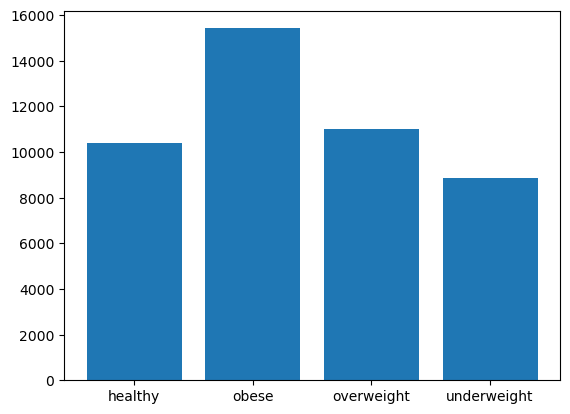

In [48]:
plt.bar(health_classes,average_charges)

In [49]:
max_charges=health_analysis['max'].values

<BarContainer object of 4 artists>

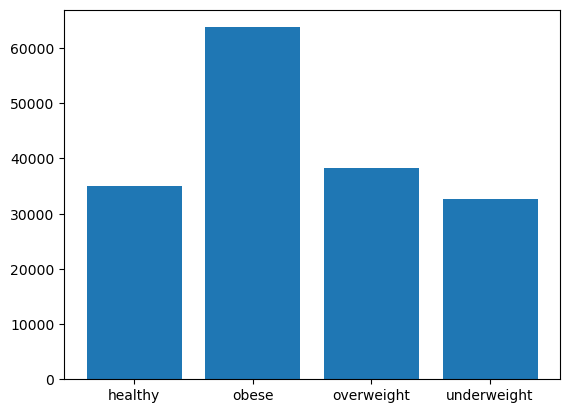

In [50]:
plt.bar(health_classes,max_charges)

In [51]:
min_charges=health_analysis['min'].values

<BarContainer object of 4 artists>

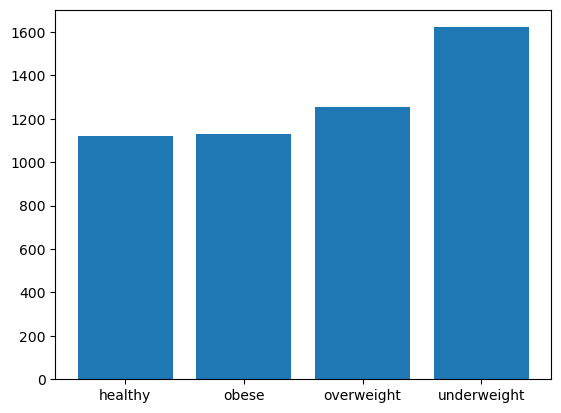

In [52]:
plt.bar(health_classes,min_charges)

In [53]:
region_group=df.groupby('region')

In [54]:
region_group

In [55]:
region_analysis=region_group['charges'].agg(['max','min','mean'])

In [56]:
region_analysis

,max,min,mean
region,,,
northeast,58571.07448,1694.7964,13406.384516
northwest,60021.39897,1621.3402,12417.575374
southeast,63770.42801,1121.8739,14735.411438
southwest,52590.82939,1241.5650,12346.937377


In [57]:
max_charges1=region_analysis['max'].values

In [58]:
region_classes=list(region_analysis.index)

<BarContainer object of 4 artists>

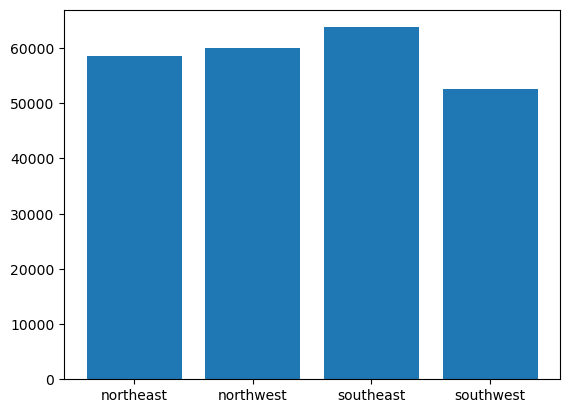

In [59]:
plt.bar(region_classes,max_charges1)

In [60]:
gender_dict={'female':0,"male":1}
smoker_dict={'yes':1,'no':0}
df['sex']=df['sex'].map(gender_dict)
df['smoker']=df['smoker'].map(smoker_dict)

In [61]:
yy=list(df.health.value_counts().keys())

In [62]:
x=df.health.value_counts()
x

health
obese          725
overweight     372
healthy        221
underweight     20
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x21983c58c90>,
 [Text(-0.14421886984790633, 1.0905048911306143, 'obese'),
  Text(-0.4629286915582138, -0.9978461938255817, 'overweight'),
  Text(0.8998309064853284, -0.6326960879709882, 'healthy'),
  Text(1.098787354751426, -0.05163670243503156, 'underweight')],
 [Text(-0.07866483809885798, 0.5948208497076077, '54.19%'),
  Text(-0.25250655903175295, -0.5442797420866808, '27.80%'),
  Text(0.4908168580829063, -0.34510695707508443, '16.52%'),
  Text(0.5993385571371413, -0.028165474055471755, '1.49%')])

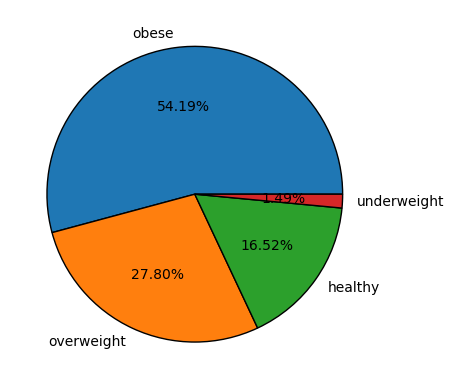

In [63]:
plt.pie(x,labels=yy,autopct="%1.2f%%",wedgeprops={'ec':'k'})

In [64]:
df['health'].value_counts()

health
obese          725
overweight     372
healthy        221
underweight     20
Name: count, dtype: int64

In [65]:
health_category_dict={'underweight':1,'healthy':2,'overweight':3,'obese':4}
df['health']=df['health'].map(health_category_dict)

In [66]:
df.head()

,age,sex,bmi,children,smoker,region,charges,health
0,19,0,27.900,0,1,southwest,16884.92400,3
1,18,1,33.770,1,0,southeast,1725.55230,4
2,28,1,33.000,3,0,southeast,4449.46200,4
3,33,1,22.705,0,0,northwest,21984.47061,2
4,32,1,28.880,0,0,northwest,3866.85520,3


In [67]:
df['region'].value_counts().keys()

Index(['southeast', 'southwest', 'northwest', 'northeast'], dtype='object', name='region')

In [68]:
#region_dict={'southwest':,'southeast':,'northwest':,'northeast':}

In [69]:
final_data=pd.get_dummies(df).astype(int)
final_data

,age,sex,bmi,children,smoker,charges,health,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27,0,1,16884,3,0,0,0,1
1,18,1,33,1,0,1725,4,0,0,1,0
2,28,1,33,3,0,4449,4,0,0,1,0
3,33,1,22,0,0,21984,2,0,1,0,0
4,32,1,28,0,0,3866,3,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30,3,0,10600,4,0,1,0,0
1334,18,0,31,0,0,2205,4,1,0,0,0
1335,18,0,36,0,0,1629,4,0,0,1,0
1336,21,0,25,0,0,2007,3,0,0,0,1


In [70]:
x=final_data.drop('charges',axis=1)
y=final_data[['charges']]

In [71]:
x

,age,sex,bmi,children,smoker,health,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27,0,1,3,0,0,0,1
1,18,1,33,1,0,4,0,0,1,0
2,28,1,33,3,0,4,0,0,1,0
3,33,1,22,0,0,2,0,1,0,0
4,32,1,28,0,0,3,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30,3,0,4,0,1,0,0
1334,18,0,31,0,0,4,1,0,0,0
1335,18,0,36,0,0,4,0,0,1,0
1336,21,0,25,0,0,3,0,0,0,1


In [72]:
y

,charges
0,16884
1,1725
2,4449
3,21984
4,3866
...,...
1333,10600
1334,2205
1335,1629
1336,2007


In [73]:
from sklearn.model_selection import train_test_split

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

In [75]:
#model training

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor

In [77]:
#Hyper parameter tuning --> to obtain highest accuracy
lnr=LinearRegression()
rdmfr=RandomForestRegressor()
dtr=DecisionTreeRegressor()

In [78]:
import warnings
warnings.filterwarnings('ignore')

In [79]:
lnr.fit(x_train,y_train)
dtr.fit(x_train,y_train)
rdmfr.fit(x_train,y_train)

RandomForestRegressor()

In [80]:
print("Training score by linear: ",lnr.score(x_train,y_train)*100)
print("Training score by DecisionTree: ",dtr.score(x_train,y_train)*100)
print("Training score by Random_Forest: ",rdmfr.score(x_train,y_train)*100)
print()
print("Testing score by linear: ",lnr.score(x_test,y_test)*100)
print("Testing score by DecisionTree: ",dtr.score(x_test,y_test)*100)
print("Testing score by Random_Forest: ",rdmfr.score(x_test,y_test)*100)

Training score by linear:  73.68811457749275
Training score by DecisionTree:  99.79345075877009
Training score by Random_Forest:  97.23417902946771

Testing score by linear:  82.1824189529348
Testing score by DecisionTree:  73.00173900259057
Testing score by Random_Forest:  89.55250851929377


In [81]:
prediction_linear=lnr.predict(x_test)
prediction_Decisiontree=dtr.predict(x_test)
prediction_Randomforest=rdmfr.predict(x_test)

In [82]:
x_test

,age,sex,bmi,children,smoker,health,region_northeast,region_northwest,region_southeast,region_southwest
1179,31,1,29,0,1,3,0,0,1,0
821,26,1,17,0,0,1,0,1,0,0
1153,35,0,35,1,0,4,0,1,0,0
946,42,1,35,2,0,4,0,0,0,1
535,38,1,28,1,0,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1200,37,1,24,2,0,2,0,1,0,0
580,59,1,25,1,0,3,1,0,0,0
348,36,0,29,1,0,4,0,0,1,0
474,54,1,25,3,1,3,0,0,0,1


In [83]:
comparison_df=pd.concat([x_test,y_test],axis=1)

In [84]:
comparison_df['Linear_Prediction']=prediction_linear
comparison_df['Decision_Tree_Prediction']=prediction_Decisiontree
comparison_df['Random_Forest_Prediction']=prediction_Randomforest

In [85]:
comparison_df

,age,sex,bmi,children,smoker,health,region_northeast,region_northwest,region_southeast,region_southwest,charges,Linear_Prediction,Decision_Tree_Prediction,Random_Forest_Prediction
1179,31,1,29,0,1,3,0,0,1,0,19350,28504.577869,19719.0,19753.51
821,26,1,17,0,0,1,0,1,0,0,2680,-894.789670,21595.0,6992.12
1153,35,0,35,1,0,4,0,1,0,0,5630,9534.165753,5377.0,5733.59
946,42,1,35,2,0,4,0,0,0,1,7160,10940.554756,7196.0,8563.26
535,38,1,28,1,0,3,1,0,0,0,6067,7852.340836,7077.0,6473.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,37,1,24,2,0,2,0,1,0,0,6198,5644.372090,6203.0,6784.38
580,59,1,25,1,0,3,1,0,0,0,12913,12567.317396,12333.0,15503.12
348,36,0,29,1,0,4,0,0,1,0,5478,8024.511959,5245.0,5245.48
474,54,1,25,3,1,3,0,0,0,1,25382,34976.909576,24667.0,24072.98


In [86]:
comparison_df.to_csv('prediction.csv',index=False)

In [87]:
#remove bmi from final_data

![Screenshot 2024-07-16 153232.png](<attachment:Screenshot 2024-07-16 153232.png>)
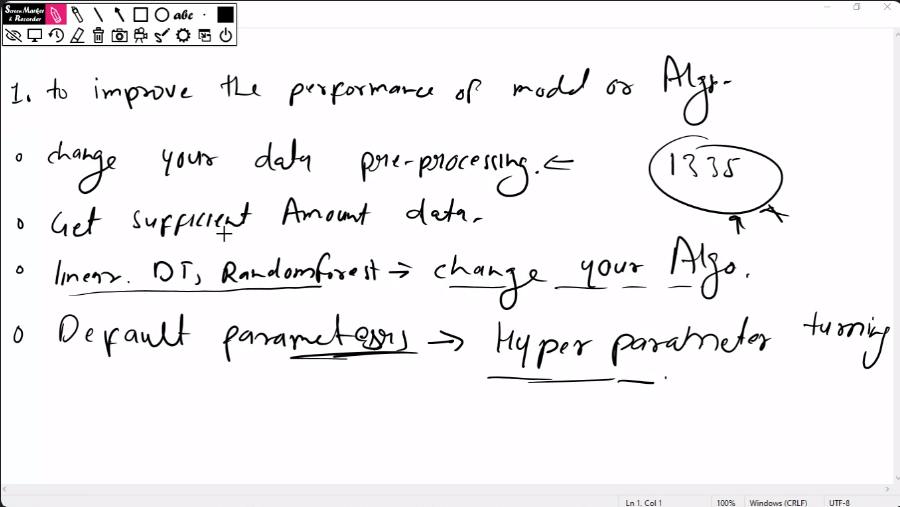

In [89]:
import joblib,os

In [91]:
os.makedirs('models',exist_ok=True)
joblib.dump(lnr,'./models/linear_model.lb')
joblib.dump(dtr,'./models/decision_tree.lb')
joblib.dump(rdmfr,'./models/randomforest.lb')

['./models/randomforest.lb']

<h1> Thank You ✔</h1>

In [ ]:
new_final_data=final_data.drop('bmi',axis=1)

In [ ]:
new_final_data

,age,sex,children,smoker,charges,health,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,0,1,16884,3,0,0,0,1
1,18,1,1,0,1725,4,0,0,1,0
2,28,1,3,0,4449,4,0,0,1,0
3,33,1,0,0,21984,2,0,1,0,0
4,32,1,0,0,3866,3,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,3,0,10600,4,0,1,0,0
1334,18,0,0,0,2205,4,1,0,0,0
1335,18,0,0,0,1629,4,0,0,1,0
1336,21,0,0,0,2007,3,0,0,0,1


In [ ]:
x=new_final_data.drop('charges',axis=1)
x

,age,sex,children,smoker,health,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,0,1,3,0,0,0,1
1,18,1,1,0,4,0,0,1,0
2,28,1,3,0,4,0,0,1,0
3,33,1,0,0,2,0,1,0,0
4,32,1,0,0,3,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,3,0,4,0,1,0,0
1334,18,0,0,0,4,1,0,0,0
1335,18,0,0,0,4,0,0,1,0
1336,21,0,0,0,3,0,0,0,1


In [ ]:
y=new_final_data[['charges']]
y

,charges
0,16884
1,1725
2,4449
3,21984
4,3866
...,...
1333,10600
1334,2205
1335,1629
1336,2007


In [ ]:
y.dropna()

,charges
0,16884
1,1725
2,4449
3,21984
4,3866
...,...
1333,10600
1334,2205
1335,1629
1336,2007


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
x_train

,age,sex,children,smoker,health,region_northeast,region_northwest,region_southeast,region_southwest
179,41,0,3,0,4,1,0,0,0
355,46,1,0,0,3,0,0,0,1
731,53,1,1,0,2,0,0,0,1
1238,37,1,3,0,2,1,0,0,0
889,57,1,1,0,4,0,1,0,0
...,...,...,...,...,...,...,...,...,...
778,35,1,3,0,4,0,0,1,0
136,19,1,0,0,4,0,0,0,1
257,38,0,0,0,4,0,0,1,0
1287,36,0,1,0,3,0,0,0,1


In [ ]:
x_test

,age,sex,children,smoker,health,region_northeast,region_northwest,region_southeast,region_southwest
436,22,1,0,0,4,1,0,0,0
960,19,0,1,0,4,0,1,0,0
517,45,1,2,0,4,0,1,0,0
110,54,1,1,0,4,0,1,0,0
281,54,1,3,1,4,1,0,0,0
...,...,...,...,...,...,...,...,...,...
51,21,0,2,0,4,0,1,0,0
119,37,0,2,0,2,0,1,0,0
892,54,1,0,0,2,1,0,0,0
1004,47,1,1,0,2,1,0,0,0


In [ ]:
y_train

,charges
179,8538
355,24603
731,10065
1238,6985
889,11945
...,...
778,5934
136,1261
257,5400
1287,5472


In [ ]:
y_test

,charges
436,2254
960,2730
517,8413
110,10825
281,48549
...,...
51,3579
119,6686
892,10422
1004,8627


In [ ]:
lnr.fit(x_train,y_train)
dtr.fit(x_train,y_train)
rdmfr.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
print("Training Score of Linear: ",lnr.score(x_train,y_train)*100)
print("Training Score of Decision Tree: ",dtr.score(x_train,y_train)*100)
print("Training Score of Rain Forest: ",rdmfr.score(x_train,y_train)*100)

print()

print("Testing Score of Linear: ",lnr.score(x_test,y_test)*100)
print("Testing Score of Decision tree: ",dtr.score(x_test,y_test)*100)
print("Testing Score of Random Forest: ",rdmfr.score(x_test,y_test)*100)

Training Score of Linear:  74.96595925122269
Training Score of Decision Tree:  98.31361777896649
Training Score of Rain Forest:  96.26468262729662

Testing Score of Linear:  75.37332088095238
Testing Score of Decision tree:  72.89107847695844
Testing Score of Random Forest:  84.52272250577293


In [ ]:
new_linear_prediction=lnr.predict(x_test)
new_decisiontree_prediction=dtr.predict(x_test)
new_randomforest=rdmfr.predict(x_test)


In [ ]:
new_linear_prediction

array([[ 5270.43762496],
       [ 4467.19462043],
       [11595.56837887],
       [13468.84141143],
       [39137.55271032],
       [ 9482.14396019],
       [10806.94627073],
       [ 8990.39066659],
       [ 8968.2280155 ],
       [29120.14760513],
       [30599.70005578],
       [ 6077.39267059],
       [13411.02418318],
       [30987.86807044],
       [36557.86144624],
       [38202.53522067],
       [31999.34967755],
       [ 9960.92693346],
       [ 7893.6094201 ],
       [31639.76387385],
       [13114.15536864],
       [14164.67151486],
       [ 4307.28491784],
       [ 9828.55638887],
       [11880.4650663 ],
       [14626.03859935],
       [36612.61668157],
       [ 6603.62168846],
       [36014.71048425],
       [ 8990.81066572],
       [10972.48759363],
       [ 4512.20172592],
       [12885.55611051],
       [ 4718.37652878],
       [27001.85041989],
       [ 4939.01403308],
       [ 5872.13700788],
       [ 7082.98285582],
       [38996.73689042],
       [ 9578.57572843],


In [ ]:
pd.concat([x_test,y_test],axis=1).head(50)

,age,sex,children,smoker,health,region_northeast,region_northwest,region_southeast,region_southwest,Linear_pred,Decision_pred,Randon_pred,charges
436,22,1,0,0,4,1,0,0,0,5270.437625,2748.000000,3503.654212,2254
960,19,0,1,0,4,0,1,0,0,4467.194620,2719.000000,3245.758000,2730
517,45,1,2,0,4,0,1,0,0,11595.568379,7443.000000,12070.598333,8413
110,54,1,1,0,4,0,1,0,0,13468.841411,17353.500000,13830.236667,10825
281,54,1,3,1,4,1,0,0,0,39137.552710,46130.000000,47066.130000,48549
1269,45,1,3,0,3,0,0,0,1,9482.143960,9301.000000,9963.663333,8615
805,45,0,0,0,4,0,1,0,0,10806.946271,6948.000000,13346.807000,7731
1056,48,0,0,0,3,0,0,0,1,8990.390667,26140.000000,16203.170000,8277
93,35,1,2,0,4,0,1,0,0,8968.228015,5584.000000,6542.958333,5729
1179,31,1,0,1,3,0,0,1,0,29120.147605,19719.000000,18783.640000,19350


In [ ]:
x_test['Linear_pred']=new_linear_prediction
x_test['Decision_pred']=new_decisiontree_prediction
x_test['Randon_pred']=new_randomforest

In [ ]:
x_test

,age,sex,children,smoker,health,region_northeast,region_northwest,region_southeast,region_southwest,Linear_pred,Decision_pred,Randon_pred
436,22,1,0,0,4,1,0,0,0,5270.437625,2748.0,3503.654212
960,19,0,1,0,4,0,1,0,0,4467.194620,2719.0,3245.758000
517,45,1,2,0,4,0,1,0,0,11595.568379,7443.0,12070.598333
110,54,1,1,0,4,0,1,0,0,13468.841411,17353.5,13830.236667
281,54,1,3,1,4,1,0,0,0,39137.552710,46130.0,47066.130000
...,...,...,...,...,...,...,...,...,...,...,...,...
51,21,0,2,0,4,0,1,0,0,5483.995988,4189.0,11674.350000
119,37,0,2,0,2,0,1,0,0,5152.231450,6933.0,7011.310000
892,54,1,0,0,2,1,0,0,0,9142.417668,10796.0,10873.180000
1004,47,1,1,0,2,1,0,0,0,7794.612709,8534.0,9812.566667
